### Loading the IMDB dataset.

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
 train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

### Decoding the reviews to text

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### performing the encoding in integer sequence via multi-hot encoding

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
# Creating and running the model for the traing set and validation set.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [10]:
# setting aside the validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5864 - accuracy: 0.7691 - val_loss: 0.5172 - val_accuracy: 0.7505
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4081 - accuracy: 0.8897 - val_loss: 0.3867 - val_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2989 - accuracy: 0.9141 - val_loss: 0.3251 - val_accuracy: 0.8796
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2320 - accuracy: 0.9293 - val_loss: 0.2846 - val_accuracy: 0.8916
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1869 - accuracy: 0.9429 - val_loss: 0.2789 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1563 - accuracy: 0.9532 - val_loss: 0.2762 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1340 - accuracy: 0.9586 - val_loss: 0.2864 - val_accuracy: 0.8863
Epoch 8/20
30

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the Loss for training and validation data

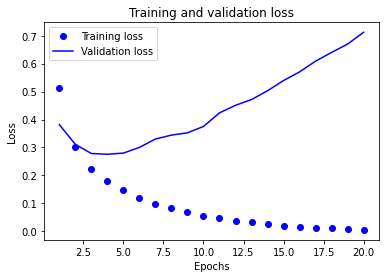

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Plotting the accuracy of training and validation set

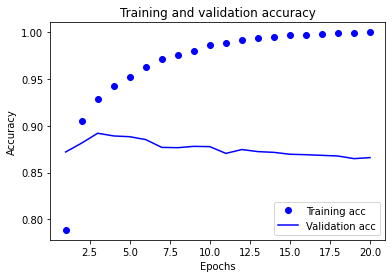

In [13]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [14]:
# Running the model for 4 epochs.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
Basic= model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 19ms/step - loss: 0.4777 - accuracy: 0.8180
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2787 - accuracy: 0.9052
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2110 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 1s 602us/step - loss: 0.2907 - accuracy: 0.8838


In [15]:
results

[0.290727436542511, 0.883840024471283]

In [16]:
# creating a model with incresed in layers.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
AddingLayers= model.fit(x_train, y_train, epochs=4, batch_size=512)
results2 = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 19ms/step - loss: 0.4425 - accuracy: 0.8247
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2500 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1951 - accuracy: 0.9287
Epoch 4/4
782/782 [==============================] - 1s 617us/step - loss: 0.3278 - accuracy: 0.8731


In [17]:
results2

[0.32783547043800354, 0.8730800151824951]

In [18]:
# creating a model with decreased in layers.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
ReducedLayers= model.fit(x_train, y_train, epochs=4, batch_size=512)
results3 = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.4370 - accuracy: 0.8272
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2679 - accuracy: 0.9099
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2132 - accuracy: 0.9280
Epoch 4/4
782/782 [==============================] - 1s 620us/step - loss: 0.2816 - accuracy: 0.8868


In [19]:
results3

[0.2815677225589752, 0.8868399858474731]

In [22]:
### Testing the loss and accuarcy of the 32 units
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
Unitswith32= model.fit(x_train, y_train, epochs=4, batch_size=512)
resultsof32units = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4368 - accuracy: 0.8168
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2447 - accuracy: 0.9104
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1881 - accuracy: 0.9312
Epoch 4/4
782/782 [==============================] - 1s 664us/step - loss: 0.3194 - accuracy: 0.8763


In [23]:
resultsof32units

[0.31940874457359314, 0.8762800097465515]

In [10]:
### Testing the loss and accuarcy of the 64 units
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
Unitswith64= model.fit(x_train, y_train, epochs=4, batch_size=512)
resultsof64units = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 39ms/step - loss: 0.4144 - accuracy: 0.8172
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2388 - accuracy: 0.9052
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1814 - accuracy: 0.9297
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3538 - accuracy: 0.8647


In [11]:
resultsof64units

[0.3538137972354889, 0.8646799921989441]

In [24]:
### using the mse loss function 
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
Mse_Lossfunction = model.fit(x_train, y_train, epochs=4, batch_size=512)
resultsofMSE = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.1750 - accuracy: 0.7671
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.0883 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0624 - accuracy: 0.9285
Epoch 4/4
782/782 [==============================] - 1s 608us/step - loss: 0.0891 - accuracy: 0.8814


In [25]:
### using the tanh activation function 
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
Activation_tanh= model.fit(x_train, y_train, epochs=4, batch_size=512)
resultsoftanh = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 17ms/step - loss: 0.4269 - accuracy: 0.8292
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2353 - accuracy: 0.9149
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1762 - accuracy: 0.9366
Epoch 4/4
782/782 [==============================] - 1s 677us/step - loss: 0.3356 - accuracy: 0.8740


In [11]:
### Applying the L2 Regularization techinque to the mmodel.

from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
L2_Regularization_tech = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.4)
resultsforL2_Regularization = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5910 - accuracy: 0.7900 - val_loss: 0.4908 - val_accuracy: 0.8304
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3944 - accuracy: 0.8953 - val_loss: 0.3868 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3307 - accuracy: 0.9134 - val_loss: 0.3830 - val_accuracy: 0.8778
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2995 - accuracy: 0.9259 - val_loss: 0.4010 - val_accuracy: 0.8681
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2786 - accuracy: 0.9351 - val_loss: 0.3614 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2645 - accuracy: 0.9381 - val_loss: 0.3663 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2614 - accuracy: 0.9378 - val_loss: 0.3864 - val_accuracy: 0.8774
Epoch 8/20
30

In [14]:
### Adding dropout technique to the model.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
Adding_dropout_tech =model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.4)
resultsofdropout = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 3s 42ms/step - loss: 0.6361 - accuracy: 0.6346 - val_loss: 0.5156 - val_accuracy: 0.8398
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5174 - accuracy: 0.7625 - val_loss: 0.3934 - val_accuracy: 0.8750
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4233 - accuracy: 0.8296 - val_loss: 0.3338 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3578 - accuracy: 0.8697 - val_loss: 0.3026 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3127 - accuracy: 0.8914 - val_loss: 0.2938 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2707 - accuracy: 0.9069 - val_loss: 0.2734 - val_accuracy: 0.8935
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2404 - accuracy: 0.9230 - val_loss: 0.2806 - val_accuracy: 0.8879
Epoch 8/20
30

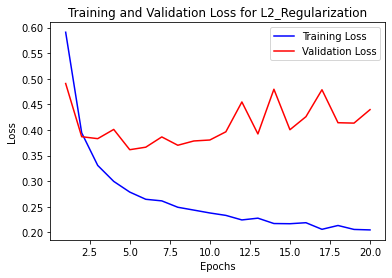

In [16]:
# Plotting the training loss and validation loss of model for L2_Regularization technique.
import matplotlib.pyplot as plt
train_loss = L2_Regularization_tech.history['loss']
val_loss = L2_Regularization_tech.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss for L2_Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

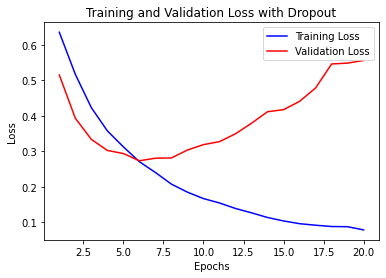

In [15]:
# plotting the traing and validation loss with dropout technique.
import matplotlib.pyplot as plt
train_loss = Adding_dropout_tech.history['loss']
val_loss = Adding_dropout_tech.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()